Logical justification based on the reasoning for the specific choice of machine learning approaches.

Multiple machine learning approaches (at least two) using hyperparameters and a comparison
between the chosen modelling approaches.

Visualise your comparison of ML modelling outcomes. You may use a statistical approach to argue that
one feature is more important than other features (for example, using PCA).

Cross-validation methods should be used to justify the authenticity of your ML results.

You can find any public dataset from an authentic resource repository and the dataset should have at least
2000 rows and 8 columns after cleaning and there is not any upper bound.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

from tabulate import tabulate

import datetime
import calendar
import regex as re
from sklearn.model_selection import GridSearchCV #tutorial5
from sklearn.preprocessing import LabelEncoder #tutorial5
from sklearn.model_selection import train_test_split #tutorial2
from sklearn.preprocessing import MinMaxScaler #tutorial5
from sklearn.feature_selection import VarianceThreshold as vt #tutorial3
from sklearn.ensemble import ExtraTreesRegressor 
#from sklearn.decomposition import PCA #tutorial7
from sklearn.metrics import mean_squared_error, r2_score #case_study
from sklearn.model_selection import KFold #tutorial3
from sklearn.model_selection import cross_val_score #tutorial3
from sklearn import metrics #tutorial2
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #tutorial2
from sklearn.model_selection import RandomizedSearchCV #tutorial2

#from sklearn.neighbors import KNeighborsClassifier #tutorial2
from sklearn.metrics import confusion_matrix #tutorial2

from sklearn.linear_model import LinearRegression, Ridge, Lasso #case_study
from sklearn.tree import DecisionTreeRegressor #tutorial4
from sklearn.ensemble import RandomForestRegressor #tutorial4
from sklearn.svm import SVR #tutorial3
from sklearn.neighbors import KNeighborsRegressor #tutorial2

In [2]:
df = pd.read_excel("flight_tickets.xlsx")
df1 = pd.read_excel("flight_tickets.xlsx") #Incase we want to rename back any column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Index

1. Exploratory Data Analysis
2. Data Normalization
3. Data Cleaning
4. Modeling testing 
> 4.1 Hyperparameter Tuning
5. Random Forest prediction
6. Final model

1. Exploratory Data Analysis

In [3]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [4]:
df.describe(include="O")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [5]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          10683 non-null  object
 1   date_of_journey  10683 non-null  object
 2   source           10683 non-null  object
 3   destination      10683 non-null  object
 4   route            10682 non-null  object
 5   dep_time         10683 non-null  object
 6   arrival_time     10683 non-null  object
 7   duration         10683 non-null  object
 8   total_stops      10682 non-null  object
 9   additional_info  10683 non-null  object
 10  price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Flight fare is the fee paid by a passenger for air transport and is made up of the charge for a passenger to fly from an origin to destination and includes the conditions, rules and restrictions. Flight fares are typically made up of fare and rule components that define the flight fare product, services and price and includes origin/destination pair, fare class, one-way/round-trip indicator, fare amount, validity dates, mileage and other rules. Flight fares are hard to guess, they typically do not follow a pattern as the price varies today, tomorrow, day after tomorrow, next week and so on. Prediction of flight fare via machine learning(by evaluating few vital parameters) is possible which will help the passengers book their intended flight on the required date and time.

A dataset comprising of few vital parameters(given below) has been given to train and predict the flight fare. 1) Airline - refers to the airline in which the passengers have completed their travel 2) Date_of_Journey - refers to the date of journey in dd/mm/yyyy format 3) Source - refers to the departure city 4) Destination - refers to the destination city 5) Route - refers to the route that the passenger travelled to reach their destination city 6) Dep_Time - refers to the departure time in 24 hour format 7) Arrival_Time - refers to the arrival time in 24 hour format. It includes the day if travel completes the next day 8) Duration - refers to the travel duration in hour and minute 9) Total_Stops - refers to the number of stops 10) Additional_Info - refers to the facilities the passenger availed. Ex: Business class, No check-in luggage included etc., 11) Price - refers to the flight fare(feature to be predicted)

In [7]:
df['airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: airline, dtype: int64

In [8]:
df['source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: source, dtype: int64

In [9]:
df['destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: destination, dtype: int64

In [10]:
df['total_stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: total_stops, dtype: int64

In [11]:
df['additional_info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: additional_info, dtype: int64

In [12]:
df.head(5)

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


- Null values analysis

<AxesSubplot:>

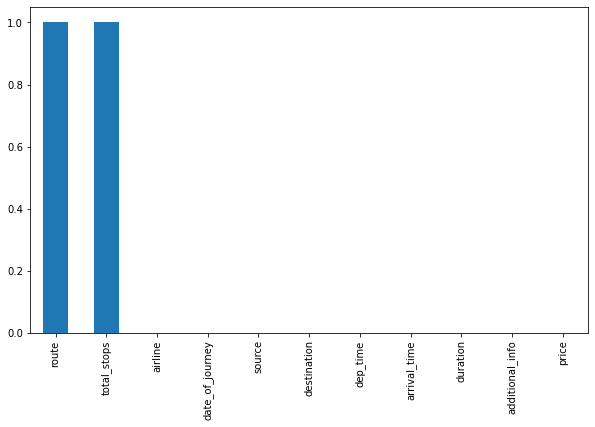

In [13]:
df.isnull().sum().nlargest(20).plot(kind='bar', figsize=(10, 6))

In [14]:
df.isnull().any().value_counts()

False    9
True     2
dtype: int64

In [15]:
df.isnull().sum().nlargest(10)

route              1
total_stops        1
airline            0
date_of_journey    0
source             0
destination        0
dep_time           0
arrival_time       0
duration           0
additional_info    0
dtype: int64

The amount of entries we do not know the route the data is tracked from it just one.

Since the column where we have null values are 'route' and total_stops and there is only 1 entry where we do not know the route for which they are being tracked, and the purpose of this project is to predict airfares based on this type of data, it is decided to remove this entry where we do not know where the data is collected from.

In [16]:
df = df.dropna(inplace=False)
df.isnull().sum().nlargest(10)

airline            0
date_of_journey    0
source             0
destination        0
route              0
dep_time           0
arrival_time       0
duration           0
total_stops        0
additional_info    0
dtype: int64

- Duplicate values analysis

In [17]:
print(df.duplicated().sum())
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

220
(10682, 11)
(10462, 11)


In order to train our model, we do not need duplicate values, as they could become a reason for overfitting.

'duration' column format changing from hours and minutes to minutes

In [18]:
def dur_conv(duration):
    dur_split = re.split('[hm]', duration)
   
    dur_in_min = 0
    
    for dur in range(0,len(dur_split)):
        if dur_split[dur] != "":
            if dur == 0:
                dur_in_min = int(dur_split[dur]) * 60
            elif dur == 1:
                dur_in_min = dur_in_min + int(dur_split[dur])
    return dur_in_min

In [19]:
df["duration"] = df["duration"].apply(dur_conv)
df.head(1)

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897


'Date_of_Journey' column format changing from "date format" to "day" format

In [20]:
def date_jour_day(date):
    day = datetime.datetime.strptime(date, '%d/%m/%Y').weekday()
    return (calendar.day_name[day])

In [21]:
df["date_of_week"] = df["date_of_journey"].apply(date_jour_day)
df.head(1)

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,date_of_week
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,Sunday


'Total_Stops' column format changing from "categorical" to "numerical"

In [22]:
def stop_conv(stop):
    if stop == "1 stop":
        stop = 1
    elif stop == "2 stops":
        stop = 2
    elif stop == "3 stops":
        stop = 3
    elif stop == "4 stops":
        stop = 4
    else:
        stop = 0
    return stop

In [23]:
df["total_stops"] = df["total_stops"].apply(stop_conv)
df.head(1)

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,date_of_week
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897,Sunday


'price' column conversion from Indian Rupees to €

In [24]:
exchange_rate = 0.011
# Create a new column for converted prices in Euro
df['price_euro'] = df['price'] * exchange_rate

'Dep_Time' and 'Arrival_Time' columns format changing to numerical values

In [25]:
def dep_time_conv(time):
    dep_time_split = re.split('[:]', time)
        
    if ((dep_time_split[0] >= "00") and (dep_time_split[0] <= "06")):
        return ('early_morning')
    elif ((dep_time_split[0] > "06") and (dep_time_split[0] <= "12")):
        return ('morning')
    elif ((dep_time_split[0] > "12") and (dep_time_split[0] <= "18")):
        return ('afternoon')
    elif ((dep_time_split[0] > "18") and (dep_time_split[0] <= "23")):
        return ('night')

In [26]:
df["dep_time"] = df["dep_time"].apply(dep_time_conv)
df["arrival_time"] = df["arrival_time"].apply(dep_time_conv)
df.head(1)

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,date_of_week,price_euro
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,night,early_morning,170,0,No info,3897,Sunday,42.867


- Top 25 routes with the highest number of journeys are listed below in ascending order.

In [27]:
top_routes = df['route'].value_counts().head(25)
print(top_routes)

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → BLR → COK           232
DEL → COK                 213
DEL → JAI → BOM → COK     183
DEL → MAA → COK           146
DEL → AMD → BOM → COK     144
DEL → IDR → BOM → COK      90
DEL → HYD → MAA → COK      83
CCU → MAA → BLR            65
CCU → HYD → BLR            53
CCU → BBI → BLR            50
DEL → BHO → BOM → COK      48
CCU → IXR → DEL → BLR      46
DEL → HYD → BOM → COK      45
DEL → NAG → BOM → COK      44
DEL → CCU → BOM → COK      44
DEL → GOI → BOM → COK      44
Name: route, dtype: int64


- Airlines distribution

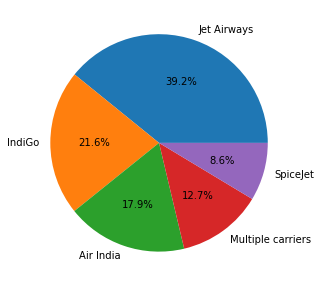

In [28]:
airline_counts = df["airline"].value_counts().head(5)

plt.figure(figsize=(5, 5))
plt.pie(airline_counts, labels=airline_counts.index, autopct="%.1f%%")
plt.show()

In [29]:
airline_counts

Jet Airways          3700
IndiGo               2043
Air India            1694
Multiple carriers    1196
SpiceJet              815
Name: airline, dtype: int64

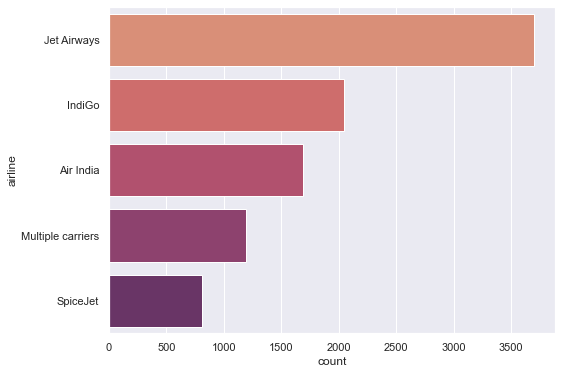

In [30]:
plt.figure(figsize=(8, 6))
sns.set_theme()
sns.countplot(y="airline", data=df, order=airline_counts.index,palette="flare")
plt.show()

JetAirways is the most common airline

- Destinations distribution

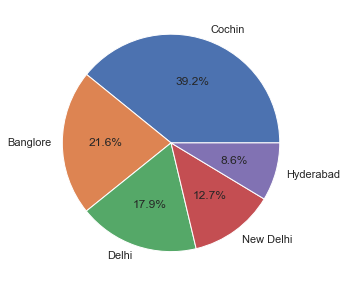

In [31]:
destination_counts = df["destination"].value_counts().head(5)

plt.figure(figsize=(5, 5))
plt.pie(airline_counts, labels=destination_counts.index, autopct="%.1f%%")
plt.show()

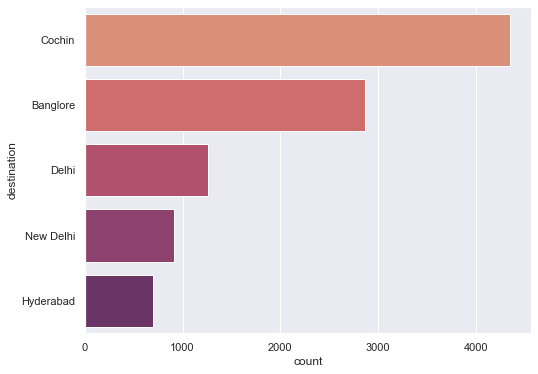

In [32]:
plt.figure(figsize=(8, 6))
sns.set_theme()
sns.countplot(y="destination", data=df, order=destination_counts.index,palette="flare")
plt.show()

- Does price vary with the duration of the flight?

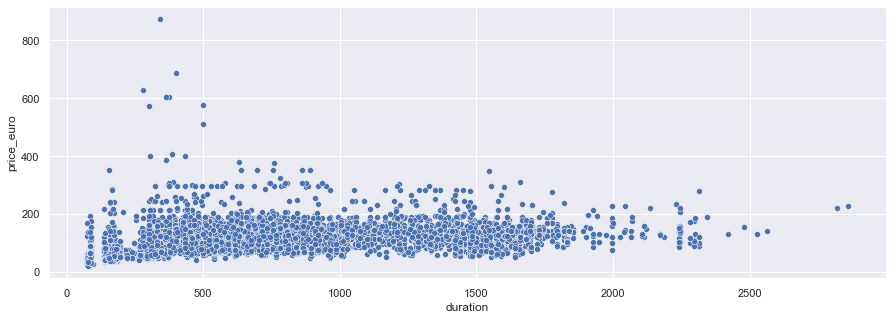

In [33]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="duration", y="price_euro", data=df,palette="flare")
plt.show()

- Additional info vs Price

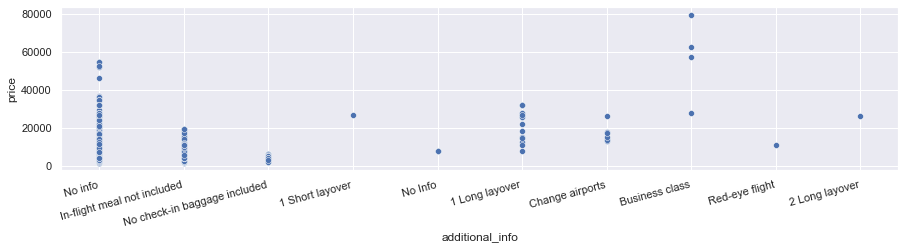

In [34]:
plt.figure(figsize=(15, 3))
scatterplot = sns.scatterplot(x="additional_info", y="price", data=df,palette="flare")

plt.xticks(rotation=15, ha='right')

plt.show()

- Does price vary with the date of week?

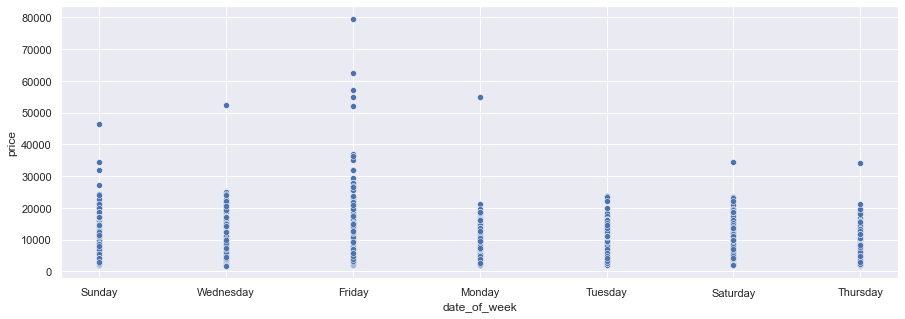

In [35]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="date_of_week", y="price", data=df,palette="flare")
plt.show()

- Does price vary with Airlines?

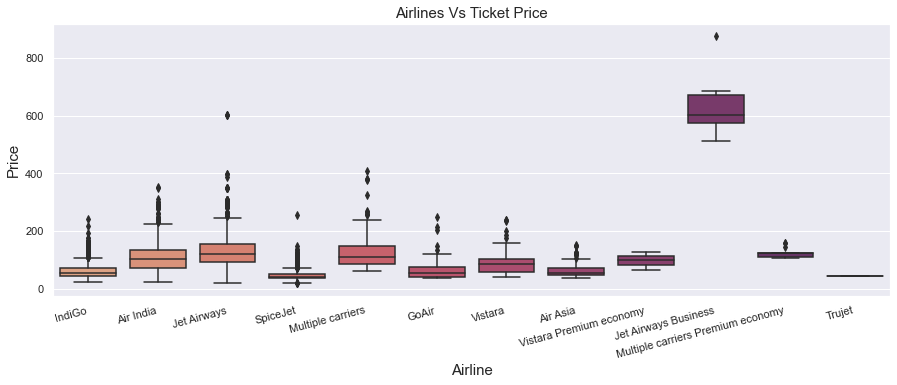

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price_euro'],palette="flare")
plt.title('Airlines Vs Ticket Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(rotation=15, ha='right')
plt.show()

Does price vary depending on the number of stops?

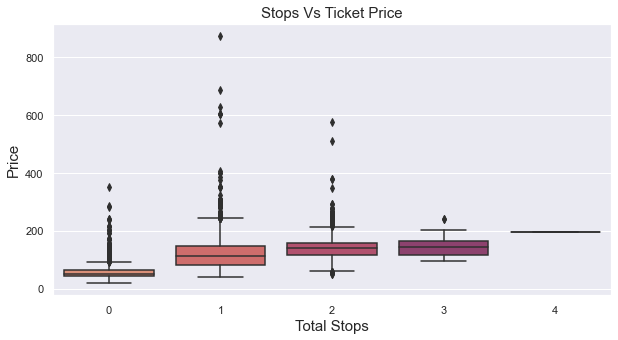

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x='total_stops',y='price_euro',data=df,palette="flare")
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Total Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### Note

The 'total_stops' feature has a significantly limited number of entries, so the conclusions from this analysis may be biased.

Does price vary depending on the departure and arriving time?

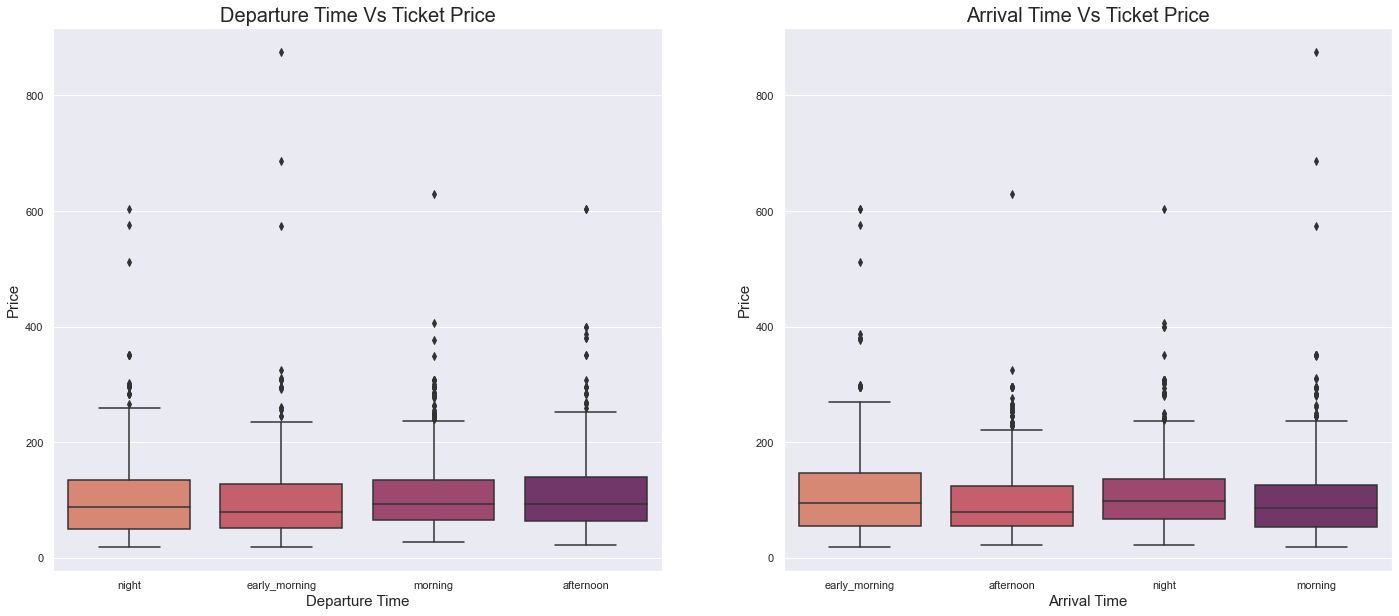

In [38]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='dep_time',y='price_euro',data=df,palette="flare")
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price_euro',data=df,palette="flare")
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Does price vary depending on the class?

In [39]:
def classify_airline(airline):
    if airline == 'Jet Airways Business':
        return 'Business'
    else:
        return 'Economy'

# Create the 'class' column using the apply function
df['class'] = df['airline'].apply(classify_airline)

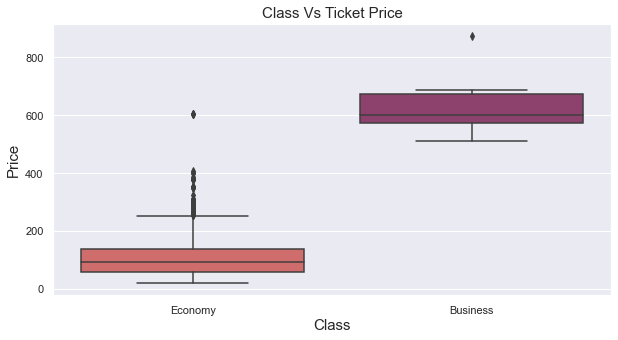

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price_euro',data=df,palette="flare")
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [41]:
df['class'].count()

10462

Does price vary depending on the destination?

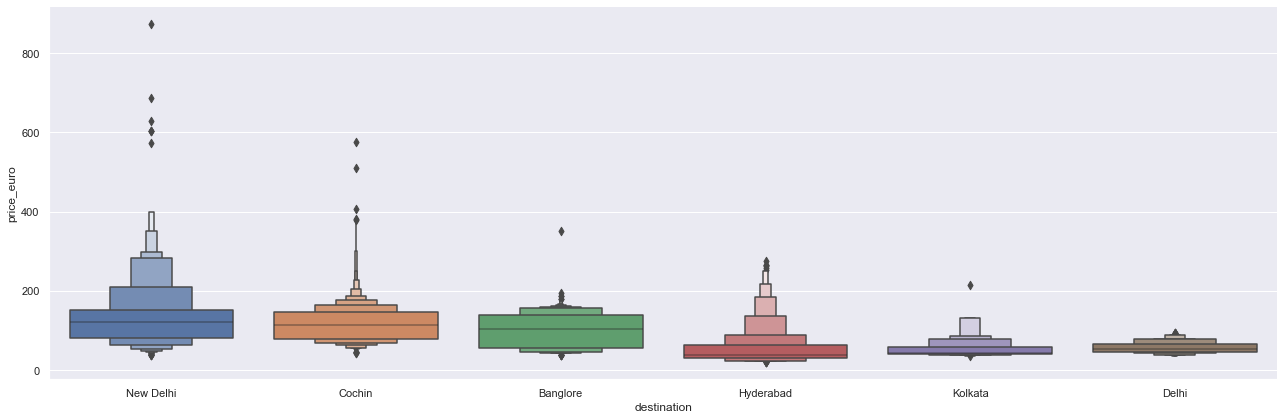

In [42]:
sns.catplot(y = "price_euro", x= "destination", data = df.sort_values("price_euro", ascending = False), kind="boxen", height = 6, aspect = 3)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          10462 non-null  object 
 1   date_of_journey  10462 non-null  object 
 2   source           10462 non-null  object 
 3   destination      10462 non-null  object 
 4   route            10462 non-null  object 
 5   dep_time         10462 non-null  object 
 6   arrival_time     10462 non-null  object 
 7   duration         10462 non-null  int64  
 8   total_stops      10462 non-null  int64  
 9   additional_info  10462 non-null  object 
 10  price            10462 non-null  int64  
 11  date_of_week     10462 non-null  object 
 12  price_euro       10462 non-null  float64
 13  class            10462 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1.4+ MB


In [44]:
df['date_of_journey'].min()

'01/03/2019'

In [45]:
df['date_of_journey'] = pd.to_datetime(df['date_of_journey'], format='%d/%m/%Y')

# Define the current date
current_date = pd.to_datetime('28/02/2019', format='%d/%m/%Y')

# Calculate the difference in days and create the 'days_left' column
df['days_left'] = (df['date_of_journey'] - current_date).dt.days

# Display the DataFrame with the new 'days_left' column
df

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,date_of_week,price_euro,class,days_left
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,night,early_morning,170,0,No info,3897,Sunday,42.867,Economy,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,early_morning,afternoon,445,2,No info,7662,Wednesday,84.282,Economy,62
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,morning,early_morning,1140,2,No info,13882,Sunday,152.702,Economy,101
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,afternoon,night,325,1,No info,6218,Sunday,68.398,Economy,73
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,afternoon,night,285,1,No info,13302,Friday,146.322,Economy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,night,night,150,0,No info,4107,Tuesday,45.177,Economy,40
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,night,night,155,0,No info,4145,Saturday,45.595,Economy,58
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,morning,morning,180,0,No info,7229,Saturday,79.519,Economy,58
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,morning,afternoon,160,0,No info,12648,Friday,139.128,Economy,1


How does the price affected on the days left for Departure?

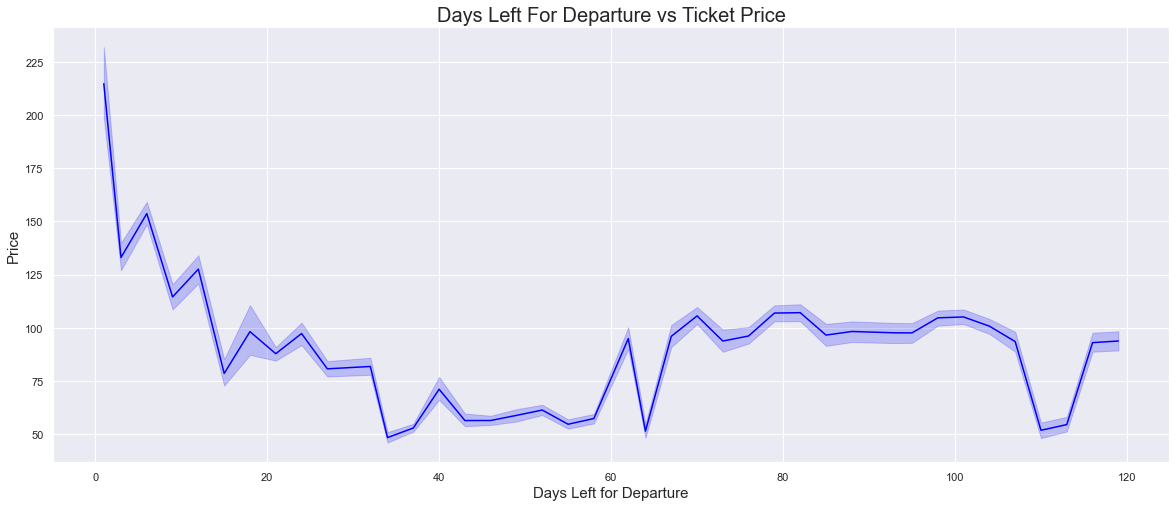

In [46]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price_euro',color="blue")
plt.title('Days Left For Departure vs Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

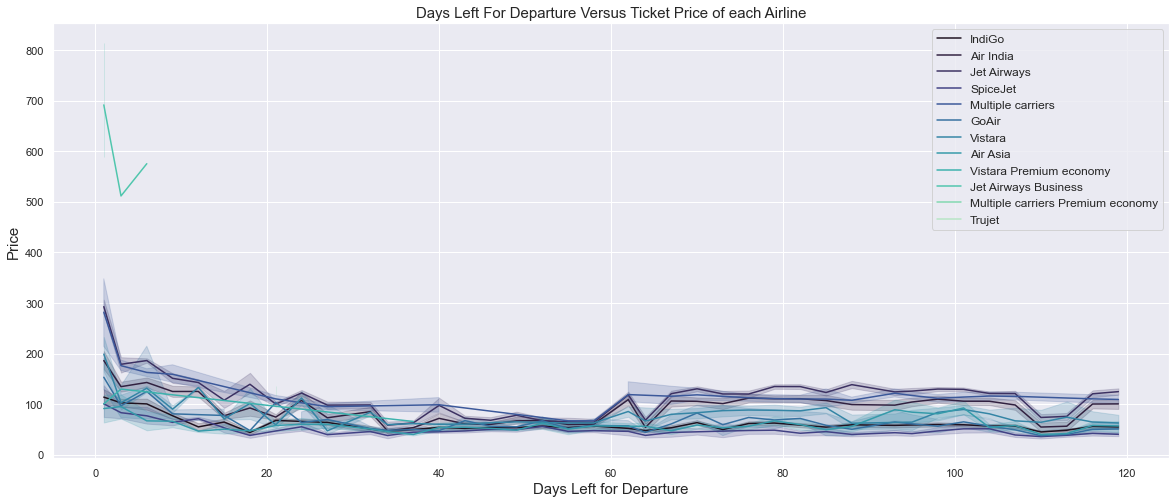

In [47]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price_euro',color='blue',hue='airline',palette="mako")
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

2. Data Normalization

- Should we apply any special treatment for categorical data?

In [48]:
df["airline"] = df["airline"].astype("category")
df["source"] = df["source"].astype("category")
df["destination"] = df["destination"].astype("category")
df["route"] = df["route"].astype("category")
df["dep_time"] = df["dep_time"].astype("category")
df["arrival_time"] = df["arrival_time"].astype("category")
df["additional_info"] = df["additional_info"].astype("category")
df["date_of_week"] = df["date_of_week"].astype("category")
df["class"] = df["class"].astype("category")
df["date_of_journey"] = df["date_of_journey"].astype("category")

lab_enc = LabelEncoder()

df["airline"] = lab_enc.fit_transform(df["airline"])
df["source"] = lab_enc.fit_transform(df["source"])
df["destination"] = lab_enc.fit_transform(df["destination"])
df["route"] = lab_enc.fit_transform(df["route"])
df["dep_time"] = lab_enc.fit_transform(df["dep_time"])
df["arrival_time"] = lab_enc.fit_transform(df["arrival_time"])
df["additional_info"] = lab_enc.fit_transform(df["additional_info"])
df["date_of_week"] = lab_enc.fit_transform(df["date_of_week"])
df["class"] = lab_enc.fit_transform(df["class"])
df["date_of_journey"] = lab_enc.fit_transform(df["date_of_journey"])

In [49]:
df = df[['airline', 'date_of_journey', 'source', 'destination', 'route', 'dep_time', 'arrival_time',
         'duration', 'total_stops', 'additional_info', 'price', 'date_of_week', 'class', 'days_left', 'price_euro']]
df = df.drop(["price"], axis=1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          10462 non-null  int32  
 1   date_of_journey  10462 non-null  int64  
 2   source           10462 non-null  int32  
 3   destination      10462 non-null  int32  
 4   route            10462 non-null  int32  
 5   dep_time         10462 non-null  int32  
 6   arrival_time     10462 non-null  int32  
 7   duration         10462 non-null  int64  
 8   total_stops      10462 non-null  int64  
 9   additional_info  10462 non-null  int32  
 10  date_of_week     10462 non-null  int32  
 11  class            10462 non-null  int32  
 12  days_left        10462 non-null  int64  
 13  price_euro       10462 non-null  float64
dtypes: float64(1), int32(9), int64(4)
memory usage: 1.1 MB


- Outliers

Should we delate outliers?

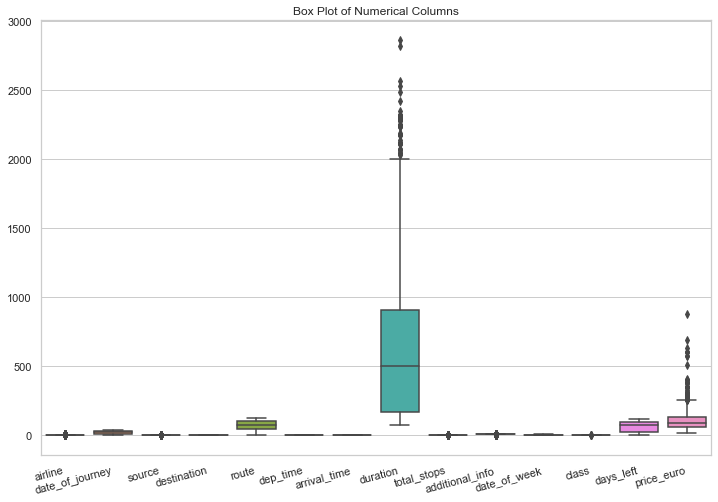

In [51]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['int32', 'int64', 'float64']))
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=15, ha='right')
plt.show()

In [52]:
df['class'].value_counts()

1    10456
0        6
Name: class, dtype: int64

### Note
- 0.0 corresponds to business class.
- As the amount of data from business class is significantly smaller than that from economy class, considering data from business class as outliers may not substantially affect the predictions.

- Further analysis will be conducted to address any outliers that may be present.

The outliers seem to correspond to business class ticket entries, so and because we want to be able to predict them, we decide to keep them.

- Should we apply any special treatment to the ordinal categorical values?

In [53]:
X = df.drop(["price_euro"], axis=1)
y = df["price_euro"]

In [54]:
min_max_scl = MinMaxScaler()
X_scl = min_max_scl.fit_transform(X)
X_scl = pd.DataFrame(X_scl, columns = df.columns[0:13])

In [55]:
df = pd.concat([X_scl.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
df

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,date_of_week,class,days_left,price_euro
0,0.272727,0.205128,0.00,1.0,0.141732,1.000000,0.333333,0.034111,0.00,0.888889,0.500000,1.0,0.194915,42.867
1,0.090909,0.512821,0.75,0.0,0.661417,0.333333,0.000000,0.132855,0.50,0.888889,1.000000,1.0,0.516949,84.282
2,0.363636,0.846154,0.50,0.2,0.929134,0.666667,0.333333,0.382406,0.50,0.888889,0.500000,1.0,0.847458,152.702
3,0.272727,0.615385,0.75,0.0,0.716535,0.000000,1.000000,0.089767,0.25,0.888889,0.500000,1.0,0.610169,68.398
4,0.272727,0.000000,0.00,1.0,0.228346,0.000000,1.000000,0.075404,0.25,0.888889,0.000000,1.0,0.000000,146.322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,0.000000,0.333333,0.75,0.0,0.503937,1.000000,1.000000,0.026930,0.00,0.888889,0.833333,1.0,0.330508,45.177
10458,0.090909,0.487179,0.75,0.0,0.503937,1.000000,1.000000,0.028725,0.00,0.888889,0.333333,1.0,0.483051,45.595
10459,0.363636,0.487179,0.00,0.4,0.141732,0.666667,0.666667,0.037702,0.00,0.888889,0.333333,1.0,0.483051,79.519
10460,0.909091,0.000000,0.00,1.0,0.141732,0.666667,0.000000,0.030521,0.00,0.888889,0.000000,1.0,0.000000,139.128


In [56]:
df.corr().T

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,date_of_week,class,days_left,price_euro
airline,1.000000,0.031913,-0.012172,0.015942,0.029636,-0.012397,0.019084,-0.153697,-0.194549,-0.058220,0.006039,-0.010323,0.031822,-0.036491
date_of_journey,0.031913,1.000000,0.178682,-0.364732,0.251436,-0.004117,0.101576,-0.002529,0.033731,-0.051768,-0.051162,0.042276,0.999910,-0.149723
source,-0.012172,0.178682,1.000000,-0.589992,0.403884,-0.003765,-0.003290,0.162914,0.194203,-0.021587,0.097456,0.025988,0.178226,0.013796
destination,0.015942,-0.364732,-0.589992,1.000000,-0.457559,0.039324,-0.036748,-0.254198,-0.291763,0.024922,-0.115544,-0.036025,-0.364746,-0.065875
route,0.029636,0.251436,0.403884,-0.457559,1.000000,-0.054993,0.063775,0.273173,0.441347,0.042804,0.107641,0.022267,0.250554,0.154374
dep_time,-0.012397,-0.004117,-0.003765,0.039324,-0.054993,1.000000,0.034792,-0.017302,-0.024075,0.009166,-0.004860,-0.007168,-0.004192,-0.027886
arrival_time,0.019084,0.101576,-0.003290,-0.036748,0.063775,0.034792,1.000000,0.101803,0.108109,0.006063,-0.009736,0.010775,0.101784,0.046758
duration,-0.153697,-0.002529,0.162914,-0.254198,0.273173,-0.017302,0.101803,1.000000,0.728123,-0.169920,0.088460,0.011634,-0.002979,0.501886
total_stops,-0.194549,0.033731,0.194203,-0.291763,0.441347,-0.024075,0.108109,0.728123,1.000000,-0.079284,0.110536,-0.019256,0.033172,0.602013
additional_info,-0.058220,-0.051768,-0.021587,0.024922,0.042804,0.009166,0.006063,-0.169920,-0.079284,1.000000,0.032865,0.037484,-0.051921,-0.068779


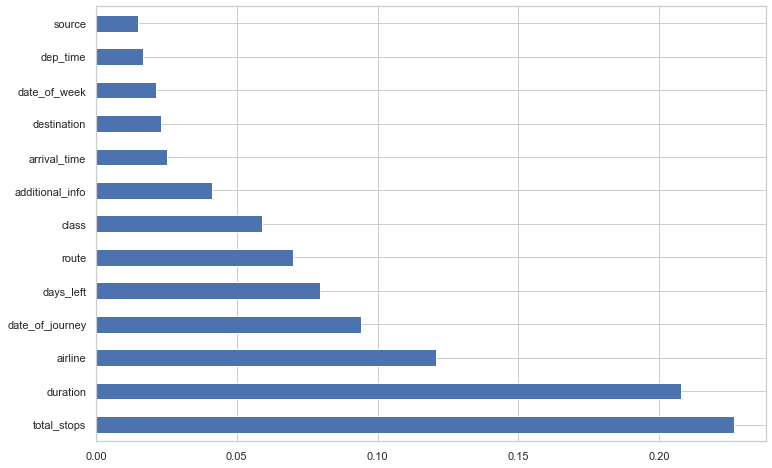

In [57]:
selection =ExtraTreesRegressor()
selection.fit(X_scl,y)
selection.feature_importances_

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index = X_scl.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

3. Data cleaning

Should we delate any feature?

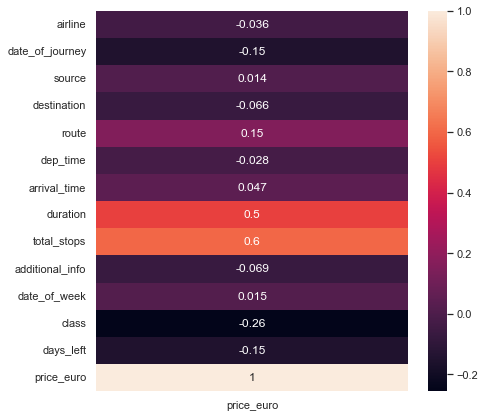

In [58]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr()[["price_euro"]], annot=True)
plt.show()

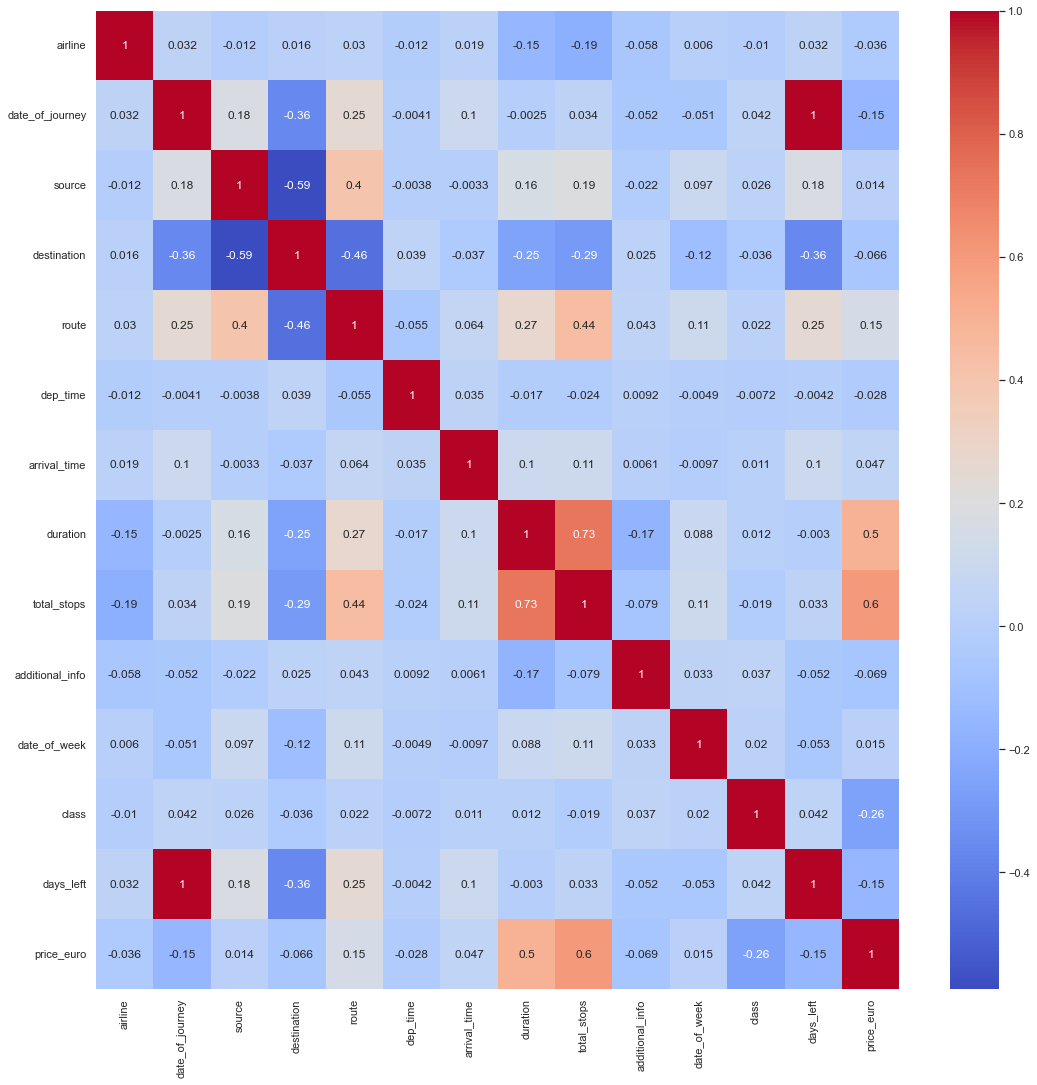

In [59]:
plt.figure(figsize = (18,18))

sns.heatmap(df.corr(),annot= True, cmap = "coolwarm")

plt.show()

- Outliers 2

In [60]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)
#Removing outliers
#df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
#sns.set(style="whitegrid")

#plt.figure(figsize=(12, 8))
#sns.boxplot(data=df.select_dtypes(include=['int32', 'int64', 'float64']))
#plt.title("Box Plot of Numerical Columns")
#plt.show()

airline             0.090909
date_of_journey     0.589744
source              0.250000
destination         0.400000
route               0.440945
dep_time            0.666667
arrival_time        0.666667
duration            0.265709
total_stops         0.250000
additional_info     0.000000
date_of_week        0.666667
class               0.000000
days_left           0.601695
price_euro         78.328250
dtype: float64


In [61]:
df = pd.concat([X_scl.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
df

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,date_of_week,class,days_left,price_euro
0,0.272727,0.205128,0.00,1.0,0.141732,1.000000,0.333333,0.034111,0.00,0.888889,0.500000,1.0,0.194915,42.867
1,0.090909,0.512821,0.75,0.0,0.661417,0.333333,0.000000,0.132855,0.50,0.888889,1.000000,1.0,0.516949,84.282
2,0.363636,0.846154,0.50,0.2,0.929134,0.666667,0.333333,0.382406,0.50,0.888889,0.500000,1.0,0.847458,152.702
3,0.272727,0.615385,0.75,0.0,0.716535,0.000000,1.000000,0.089767,0.25,0.888889,0.500000,1.0,0.610169,68.398
4,0.272727,0.000000,0.00,1.0,0.228346,0.000000,1.000000,0.075404,0.25,0.888889,0.000000,1.0,0.000000,146.322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,0.000000,0.333333,0.75,0.0,0.503937,1.000000,1.000000,0.026930,0.00,0.888889,0.833333,1.0,0.330508,45.177
10458,0.090909,0.487179,0.75,0.0,0.503937,1.000000,1.000000,0.028725,0.00,0.888889,0.333333,1.0,0.483051,45.595
10459,0.363636,0.487179,0.00,0.4,0.141732,0.666667,0.666667,0.037702,0.00,0.888889,0.333333,1.0,0.483051,79.519
10460,0.909091,0.000000,0.00,1.0,0.141732,0.666667,0.000000,0.030521,0.00,0.888889,0.000000,1.0,0.000000,139.128


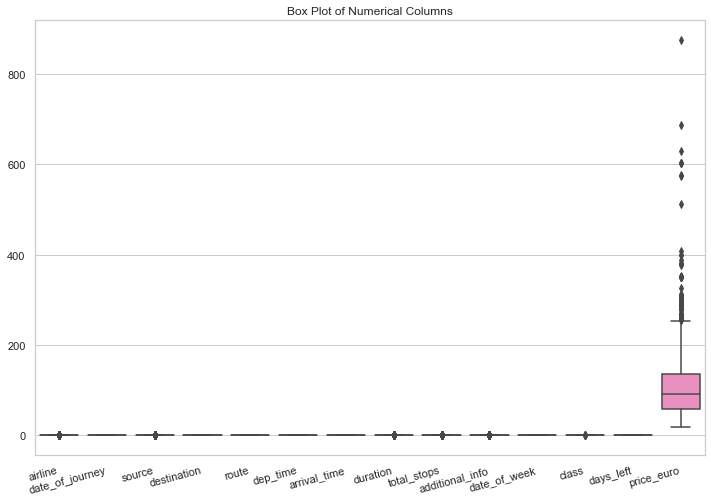

In [62]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['int32', 'int64', 'float64']))
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=15, ha='right')
plt.show()

In [63]:
var_thr = vt(threshold=0.1)
var_thr.fit(X_scl)
print(var_thr.get_support())

[False False False False False  True  True False False False  True False
 False]


In [64]:
df = df.drop(columns=['additional_info', 'route', 'date_of_journey','class','destination','source','airline'], axis=1)
df.head()

,dep_time,arrival_time,duration,total_stops,date_of_week,days_left,price_euro
0,1.000000,0.333333,0.034111,0.00,0.5,0.194915,42.867
1,0.333333,0.000000,0.132855,0.50,1.0,0.516949,84.282
2,0.666667,0.333333,0.382406,0.50,0.5,0.847458,152.702
3,0.000000,1.000000,0.089767,0.25,0.5,0.610169,68.398
4,0.000000,1.000000,0.075404,0.25,0.0,0.000000,146.322


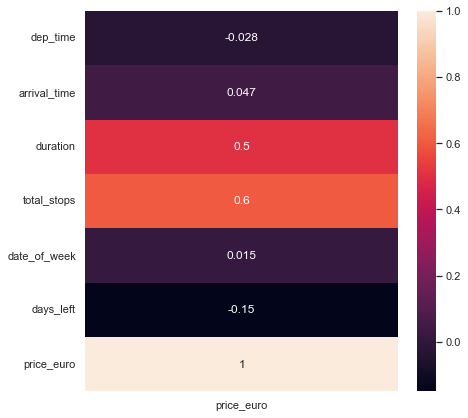

In [65]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr()[["price_euro"]], annot=True)
plt.show()

### Note

We could have kept 'route', but since we split into source and destination, it makes more sense to keep these two.

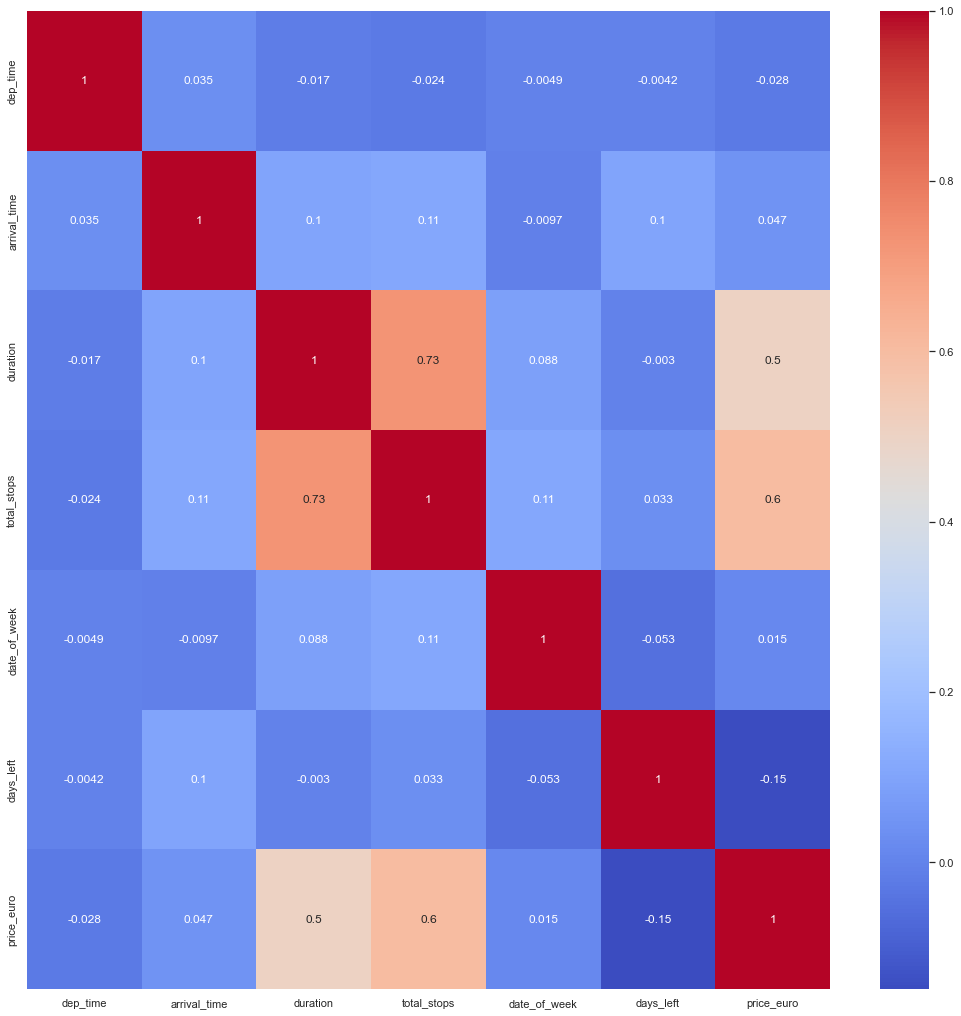

In [66]:
plt.figure(figsize = (18,18))

sns.heatmap(df.corr(),annot= True, cmap = "coolwarm")

plt.show()

4. Modeling testing

Which model should we choose?

- Training splits 80-20%

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scl, y, test_size=0.2)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10462, 13), (10462,), (8369, 13), (2093, 13), (8369,), (2093,))

In [68]:
regression_models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=500, max_depth=10)),
    ('Support Vector Regressor', SVR()),
    ('K-Nearest Neighbours Regressor', KNeighborsRegressor())]

results = []
names = []

for name, model in regression_models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append([-cv_results.mean(), cv_results.std()])
    names.append(name)
    print('%s: %f (%f)' % (name, -cv_results.mean(), cv_results.std()))

headers = ["Model", "Mean Squared Error (mean)", "Mean Squared Error (std)"]

print(tabulate(zip(names, *zip(*results)), headers=headers, tablefmt="grid"))

Linear Regression: 1378.948429 (165.017366)
Ridge Regression: 1394.651723 (173.961071)
Lasso Regression: 1648.825436 (291.540675)
Decision Tree Regressor: 464.387810 (166.006223)
Random Forest Regressor: 367.500633 (117.947360)
Support Vector Regressor: 1595.426363 (323.568898)
K-Nearest Neighbours Regressor: 814.995461 (187.556112)
+--------------------------------+-----------------------------+----------------------------+
| Model                          |   Mean Squared Error (mean) |   Mean Squared Error (std) |
+================================+=============================+============================+
| Linear Regression              |                    1378.95  |                    165.017 |
+--------------------------------+-----------------------------+----------------------------+
| Ridge Regression               |                    1394.65  |                    173.961 |
+--------------------------------+-----------------------------+----------------------------+
| Lasso

In [69]:
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    train_score = model.score(X_train, y_train)
    return [train_score, mse, r2, mae]

results = []


for name, model in regression_models:
    print(f"Evaluating {name} on the test set...")
   
    model.fit(X_train, y_train)
    
    metrics = get_metrics(model, X_test, y_test)
    
    results.append([name] + metrics)

headers = ["Model", "Train Score", "Mean Squared Error", "R-squared", "Mean Absolute Error"]

print(tabulate(results, headers=headers, tablefmt="grid"))

Evaluating Linear Regression on the test set...
Evaluating Ridge Regression on the test set...
Evaluating Lasso Regression on the test set...
Evaluating Decision Tree Regressor on the test set...
Evaluating Random Forest Regressor on the test set...
Evaluating Support Vector Regressor on the test set...
Evaluating K-Nearest Neighbours Regressor on the test set...
+--------------------------------+---------------+----------------------+-------------+-----------------------+
| Model                          |   Train Score |   Mean Squared Error |   R-squared |   Mean Absolute Error |
+================================+===============+======================+=============+=======================+
| Linear Regression              |      0.483939 |             1268.64  |    0.453352 |              27.1936  |
+--------------------------------+---------------+----------------------+-------------+-----------------------+
| Ridge Regression               |      0.479757 |             1262.83  | 

### Note
Splitting the dataset 80% training and 20% we already can see the algorithms with a better predicction performance are Decision Tree and Random Forest, so that it is been decided to carry on with the analysis just using this algorithms. 

- Training splits 90-10%

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_scl, y, test_size=0.1)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10462, 13), (10462,), (9415, 13), (1047, 13), (9415,), (1047,))

In [71]:
regression_models = [
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=500, max_depth=10)),
]

results = []
names = []

for name, model in regression_models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append([-cv_results.mean(), cv_results.std()])
    names.append(name)
    print('%s: %f (%f)' % (name, -cv_results.mean(), cv_results.std()))

headers = ["Model", "Mean Squared Error (mean)", "Mean Squared Error (std)"]

print(tabulate(zip(names, *zip(*results)), headers=headers, tablefmt="grid"))

Decision Tree Regressor: 513.805810 (175.634083)
Random Forest Regressor: 361.890735 (127.874783)
+-------------------------+-----------------------------+----------------------------+
| Model                   |   Mean Squared Error (mean) |   Mean Squared Error (std) |
+=========================+=============================+============================+
| Decision Tree Regressor |                     513.806 |                    175.634 |
+-------------------------+-----------------------------+----------------------------+
| Random Forest Regressor |                     361.891 |                    127.875 |
+-------------------------+-----------------------------+----------------------------+


In [72]:
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    train_score = model.score(X_train, y_train)
    return [train_score, mse, r2, mae]

results = []

for name, model in regression_models:
    print(f"Evaluating {name} on the test set...")
    
    model.fit(X_train, y_train)
    
    metrics = get_metrics(model, X_test, y_test)
    
    results.append([name] + metrics)

headers = ["Model", "Train Score", "Mean Squared Error", "R-squared", "Mean Absolute Error"]

print(tabulate(results, headers=headers, tablefmt="grid"))

Evaluating Decision Tree Regressor on the test set...
Evaluating Random Forest Regressor on the test set...
+-------------------------+---------------+----------------------+-------------+-----------------------+
| Model                   |   Train Score |   Mean Squared Error |   R-squared |   Mean Absolute Error |
+=========================+===============+======================+=============+=======================+
| Decision Tree Regressor |      0.994643 |              221.628 |    0.914388 |               6.9058  |
+-------------------------+---------------+----------------------+-------------+-----------------------+
| Random Forest Regressor |      0.92791  |              229.46  |    0.911363 |               9.38698 |
+-------------------------+---------------+----------------------+-------------+-----------------------+


- Training splits 70-30%

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_scl, y, test_size=0.3)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10462, 13), (10462,), (7323, 13), (3139, 13), (7323,), (3139,))

In [74]:
regression_models = [
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=500, max_depth=10)),
]

results = []
names = []

for name, model in regression_models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append([-cv_results.mean(), cv_results.std()])
    names.append(name)
    print('%s: %f (%f)' % (name, -cv_results.mean(), cv_results.std()))

headers = ["Model", "Mean Squared Error (mean)", "Mean Squared Error (std)"]

print(tabulate(zip(names, *zip(*results)), headers=headers, tablefmt="grid"))

Decision Tree Regressor: 494.572046 (184.898683)
Random Forest Regressor: 374.295451 (165.447839)
+-------------------------+-----------------------------+----------------------------+
| Model                   |   Mean Squared Error (mean) |   Mean Squared Error (std) |
+=========================+=============================+============================+
| Decision Tree Regressor |                     494.572 |                    184.899 |
+-------------------------+-----------------------------+----------------------------+
| Random Forest Regressor |                     374.295 |                    165.448 |
+-------------------------+-----------------------------+----------------------------+


In [75]:
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    train_score = model.score(X_train, y_train)
    return [train_score, mse, r2, mae]

results = []

for name, model in regression_models:
    print(f"Evaluating {name} on the test set...")
    
    model.fit(X_train, y_train)
    
    metrics = get_metrics(model, X_test, y_test)
    
    results.append([name] + metrics)

headers = ["Model", "Train Score", "Mean Squared Error", "R-squared", "Mean Absolute Error"]

print(tabulate(results, headers=headers, tablefmt="grid"))

Evaluating Decision Tree Regressor on the test set...
Evaluating Random Forest Regressor on the test set...
+-------------------------+---------------+----------------------+-------------+-----------------------+
| Model                   |   Train Score |   Mean Squared Error |   R-squared |   Mean Absolute Error |
+=========================+===============+======================+=============+=======================+
| Decision Tree Regressor |      0.994739 |              479.743 |    0.821956 |               8.01483 |
+-------------------------+---------------+----------------------+-------------+-----------------------+
| Random Forest Regressor |      0.929308 |              328.007 |    0.878269 |               9.6725  |
+-------------------------+---------------+----------------------+-------------+-----------------------+


As evidenced, optimal results are achieved by utilising random forest and decision tree methods in combination with a 70-30% data split. Therefore, we have decided to select them for further examination to ascertain if improvements can be made to achieve even more accurate predictions.
### Best performance
- Random forest
- Decision tree
- Splitting 70-30%

### Note 
The algorithm we have obtained the best performances are decision tree and random forest and, although the Decision Tree Regressor shows a high R-squared score on the training set, the test set also demonstrates a reasonably high score, indicating some level of generalisation.
On the other hand, the Random Forest Regressor performs slightly better on the test set with a lower training R-squared score, suggesting better generalisation compared to the Decision Tree Regressor.
Therefore, we could attempt to perform hyperparameter tuning to enhance the efficacy of both models, especially the one generated from the random forest algorithm.

4.1 Hyperparameter Tuning

- Is Hyperparametring useful?

In [76]:
# # Decision Tree hyperparameter tuning
# dt_param_grid = {
#    'max_depth': [None, 10, 20, 30, 40, 50],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'max_features': ['auto', 'sqrt', 'log2']
# }

# dt_model = DecisionTreeRegressor()
# dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
# dt_grid_search.fit(X_train, y_train)

# print("Best Decision Tree Parameters:", dt_grid_search.best_params_)
# print("Best Decision Tree Score:", dt_grid_search.best_score_)

# # Random Forest hyperparameter tuning
# rf_param_grid = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# rf_model = RandomForestRegressor()
# rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
# rf_grid_search.fit(X_train, y_train)

# print("Best Random Forest Parameters:", rf_grid_search.best_params_)
# print("Best Random Forest Score:", rf_grid_search.best_score_)

### Note
The negative mean squared error serves as a frequently used metric for optimizing grid search. The closer the score approximates 0 (or the more negative it is), the greater the model's performance. 

### Decision Tree hyperparameters tuned
Best Parameters:

max_depth: 20
max_features: 'sqrt'
min_samples_leaf: 2
min_samples_split: 10
Best Score: -498.92 (negative mean squared error)

### Random Forest hyperparameters tuned
Best Parameters:

max_depth: 20
max_features: 'log2'
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 300
Best Score: -348.72 (negative mean squared error)

- Decision Tree hyperparameter tuned

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_scl, y, test_size=0.3)

regression_models = [
    ('Decision Tree Regressor', DecisionTreeRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2, min_samples_split=10)),
]

results = []
names = []

for name, model in regression_models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append([-cv_results.mean(), cv_results.std()])
    names.append(name)
    print('%s: %f (%f)' % (name, -cv_results.mean(), cv_results.std()))

headers = ["Model", "Mean Squared Error (mean)", "Mean Squared Error (std)"]

print(tabulate(zip(names, *zip(*results)), headers=headers, tablefmt="grid"))

Decision Tree Regressor: 559.579168 (165.359427)
+-------------------------+-----------------------------+----------------------------+
| Model                   |   Mean Squared Error (mean) |   Mean Squared Error (std) |
+=========================+=============================+============================+
| Decision Tree Regressor |                     559.579 |                    165.359 |
+-------------------------+-----------------------------+----------------------------+


In [78]:
regression_models = [
    ('Decision Tree Regressor', DecisionTreeRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2, min_samples_split=10)),
]

results = []

for name, model in regression_models:
    print(f"Evaluating {name} on the test set...")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    train_score = model.score(X_train, y_train)
    
    results.append([name, train_score, mse, r2, mae])

headers = ["Model", "Train Score", "Mean Squared Error", "R-squared", "Mean Absolute Error"]

print(tabulate(results, headers=headers, tablefmt="grid"))

Evaluating Decision Tree Regressor on the test set...
+-------------------------+---------------+----------------------+-------------+-----------------------+
| Model                   |   Train Score |   Mean Squared Error |   R-squared |   Mean Absolute Error |
+=========================+===============+======================+=============+=======================+
| Decision Tree Regressor |      0.889578 |              538.528 |    0.795906 |               11.4006 |
+-------------------------+---------------+----------------------+-------------+-----------------------+


- Random Forest hyperparameter tuned.

In [79]:
regression_models = [
    ('Random Forest Regressor', RandomForestRegressor(max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=300)),
]

results = []
names = []

for name, model in regression_models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append([-cv_results.mean(), cv_results.std()])
    names.append(name)
    print('%s: %f (%f)' % (name, -cv_results.mean(), cv_results.std()))

headers = ["Model", "Mean Squared Error (mean)", "Mean Squared Error (std)"]

print(tabulate(zip(names, *zip(*results)), headers=headers, tablefmt="grid"))

Random Forest Regressor: 320.035002 (132.256700)
+-------------------------+-----------------------------+----------------------------+
| Model                   |   Mean Squared Error (mean) |   Mean Squared Error (std) |
+=========================+=============================+============================+
| Random Forest Regressor |                     320.035 |                    132.257 |
+-------------------------+-----------------------------+----------------------------+


In [80]:
regression_models = [
    ('Random Forest Regressor', RandomForestRegressor(max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=300)),
]

results = []

for name, model in regression_models:
    print(f"Evaluating {name} on the test set...")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    train_score = model.score(X_train, y_train)

    results.append([name, train_score, mse, r2, mae])

headers = ["Model", "Train Score", "Mean Squared Error", "R-squared", "Mean Absolute Error"]

print(tabulate(results, headers=headers, tablefmt="grid"))

Evaluating Random Forest Regressor on the test set...
+-------------------------+---------------+----------------------+-------------+-----------------------+
| Model                   |   Train Score |   Mean Squared Error |   R-squared |   Mean Absolute Error |
+=========================+===============+======================+=============+=======================+
| Random Forest Regressor |      0.972614 |              304.811 |    0.884481 |               9.02995 |
+-------------------------+---------------+----------------------+-------------+-----------------------+


Based on the outcomes of hyperparameter tuning, the Random Forest model had a superior performance against the Decision Tree model, achieving a more negative score in terms of mean squared error and a lower result that is closer to 0. Using Random Forest also mitigates the effect of outliers in our data, thus making our predictions more reliable.

### Decision Tree Regressor:

- Train Score (R-squared on training data):

> Before Tuning: 99.47%

> After Tuning: 88.96%

Interpretation: The decrease in the training R-squared suggests that the model's fit to the training data is less perfect after hyperparameter tuning. This could be seen as a positive sign, as the model might be less prone to overfitting.

- Mean Squared Error (MSE):

> Before Tuning: 479.743

> After Tuning: 538.528

Interpretation: The decrease in MSE is positive, indicating that the model's predictions are closer to the actual values on the test set after hyperparameter tuning.

- R-squared on the test set:

> Before Tuning: 82.20%

> After Tuning: 79.59%

Interpretation: The increase in R-squared on the test set suggests improved generalization performance after hyperparameter tuning. The model is explaining a larger proportion of the variance in the test set.

- Mean Absolute Error (MAE):

> Before Tuning: 8.01

> After Tuning: 11.40

Interpretation: The decrease in MAE is positive, indicating improved accuracy on average after hyperparameter tuning.

### Random Forest Regressor:

- Train Score (R-squared on training data):

> Before Tuning: 92.93%

> After Tuning: 97.26%

Interpretation: The increase in the training R-squared suggests improved model fit to the training data after hyperparameter tuning.

- Mean Squared Error (MSE):

> Before Tuning: 328.007

> After Tuning: 304.811

Interpretation: The decrease in MSE indicates that the model's predictions are closer to the actual values on the test set after hyperparameter tuning.

- R-squared on the test set:

> Before Tuning: 87.82%

> After Tuning: 88.45%

Interpretation: The slight decrease in R-squared on the test set suggests a minor reduction in generalization performance. This could be due to the trade-off between bias and variance.

- Mean Absolute Error (MAE):

> Before Tuning: 9.67

> After Tuning: 9.03

Interpretation: The significant decrease in MAE is positive, indicating substantially improved accuracy on average after hyperparameter tuning.

Overall Interpretation:

Hyperparameter tuning has generally led to improvements in model performance for both the Decision Tree Regressor and the Random Forest Regressor.

The models appear to be more balanced after tuning, showing improved generalization performance without sacrificing too much training performance.

The Random Forest Regressor, in particular, has seen significant improvements in terms of accuracy and MSE.
In summary, the hyperparameter tuning process has resulted in models that are more robust, generalize better to unseen data, and provide more accurate predictions on the test set.

5. Random Forest prediction

Once we have decided which algorithm we are using we are performing some visualizations in order to visualy analyse their performance.
We are deciding to visualise Random Forest prediction.

In [81]:
regression_models = [
    ('Random Forest Regressor', RandomForestRegressor(max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=300)),
]

results = []

for name, model in regression_models:
    print(f"Evaluating {name} on the test set...")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    train_score = model.score(X_train, y_train)

    results.append([name, train_score, mse, r2, mae])

headers = ["Model", "Train Score", "Mean Squared Error", "R-squared", "Mean Absolute Error"]

print(tabulate(results, headers=headers, tablefmt="grid"))

Evaluating Random Forest Regressor on the test set...
+-------------------------+---------------+----------------------+-------------+-----------------------+
| Model                   |   Train Score |   Mean Squared Error |   R-squared |   Mean Absolute Error |
+=========================+===============+======================+=============+=======================+
| Random Forest Regressor |      0.973467 |              309.261 |    0.882794 |               9.02721 |
+-------------------------+---------------+----------------------+-------------+-----------------------+


Evaluating Random Forest Regressor on the test set...
Train score 0.9726280635767292


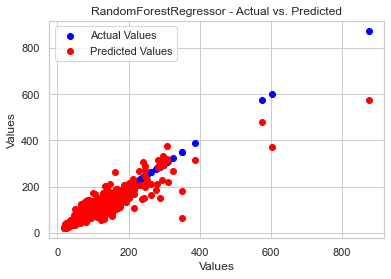

In [90]:
def plot_actual_vs_predicted(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    plt.scatter(y_test, y_test, color='blue', label='Actual Values')
    
    plt.scatter(y_test, y_pred, color='red', label='Predicted Values')
    
    plt.xlabel("Values")
    plt.ylabel("Values")
    plt.title(f"{type(model).__name__} - Actual vs. Predicted")
    plt.legend()
    plt.show()


for name, model in regression_models:
    print(f"Evaluating {name} on the test set...")

    model.fit(X_train, y_train)

    get_metrics(model, X_test, y_test)
    print(f'Train score {model.score(X_train, y_train)}')

    plot_actual_vs_predicted(model, X_test, y_test)

    print("\n")

Evaluating Random Forest Regressor on the test set...


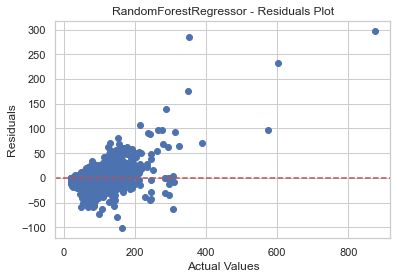

In [83]:
def plot_residuals(model, X_test, y_test):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    plt.scatter(y_test, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Residuals")
    plt.title(f"{type(model).__name__} - Residuals Plot")
    plt.show()

# Iterate through the regression models
for name, model in regression_models:
    print(f"Evaluating {name} on the test set...")

    # Train the model
    model.fit(X_train, y_train)

    # Get and print the model's performance metrics on the test set
    get_metrics(model, X_test, y_test)

    plot_residuals(model, X_test, y_test)

    # Add any additional analysis or output as needed
    print("\n")

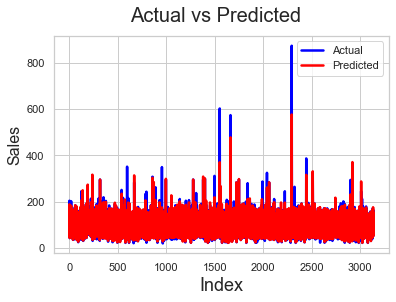

In [84]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
def plot_actual_vs_predicted(actual_values, predicted_values, title='Actual and Predicted', x_label='Index', y_label='Sales'):
    c = [i for i in range(1, len(actual_values) + 1)]  # generating index 
    fig = plt.figure()
    plt.plot(c, actual_values, color="blue", linewidth=2.5, linestyle="-", label='Actual')
    plt.plot(c, predicted_values, color="red", linewidth=2.5, linestyle="-", label='Predicted')
    fig.suptitle(title, fontsize=20)  # Plot heading 
    plt.xlabel(x_label, fontsize=18)  # X-label
    plt.ylabel(y_label, fontsize=16)  # Y-label
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_test, y_pred, title='Actual vs Predicted', x_label='Index', y_label='Sales')

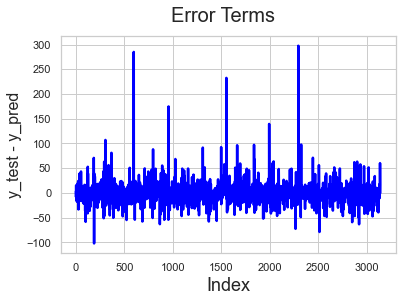

In [85]:
def plot_error_terms(error_terms, title='Error Terms', x_label='Index', y_label='y_test - y_pred'):
    c = [i for i in range(1, len(error_terms) + 1)]  # generating index 
    fig = plt.figure()
    plt.plot(c, error_terms, color="blue", linewidth=2.5, linestyle="-")
    fig.suptitle(title, fontsize=20)  # Plot heading 
    plt.xlabel(x_label, fontsize=18)  # X-label
    plt.ylabel(y_label, fontsize=16)  # Y-label
    plt.show()

# Assuming you have error_terms (y_test - y_pred) from your regression model
# You can call the function like this:
plot_error_terms(y_test - y_pred, title='Error Terms', x_label='Index', y_label='y_test - y_pred')

6. Final model

In [86]:
rf = RandomForestRegressor(max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=300)

rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

test_df = pd.DataFrame({
    "Predicted Price": predictions,
    "Actual Price": y_test,
}).reset_index(drop=True)

test_df.head(15)

,Predicted Price,Actual Price
0,76.476407,76.571
1,173.038760,166.485
2,192.940346,204.050
3,83.839941,86.152
4,43.219783,42.438
5,79.428250,79.519
6,114.144733,114.048
7,122.979821,127.556
8,65.434395,46.849
9,101.228138,107.734


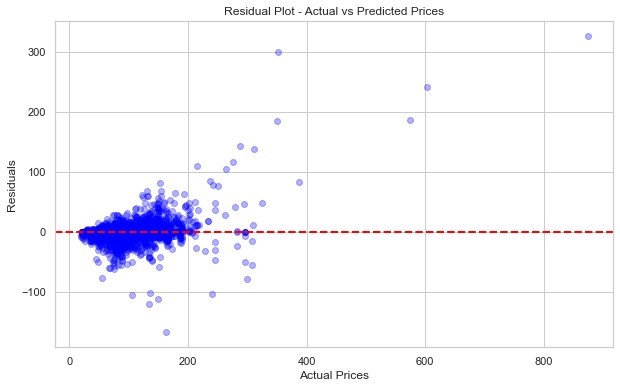

In [87]:
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot - Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.show()

In [92]:
mean_difference = np.mean(predictions - y_test)

print(f"Mean Difference between Actual and Predicted Prices: {round(mean_difference*100,2)}")

Mean Difference between Actual and Predicted Prices: 14.52


### References

www.sciencedirect.com. (n.d.). Mean Absolute Error - an overview | ScienceDirect Topics. [online] Available at: https://www.sciencedirect.com/topics/engineering/mean-absolute-error.`

Jamal, T. (2021). Hyperparameter tuning in Python. [online] Medium. Available at: https://towardsdatascience.com/hyperparameter-tuning-in-python-21a76794a1f7.

Yadav, D. (2019). Categorical encoding using Label-Encoding and One-Hot-Encoder. [online] Medium. Available at: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd.

Vincent Abba, I. (2023). What is R Squared? R2 Value Meaning and Definition. [online] freeCodeCamp.org. Available at: https://www.freecodecamp.org/news/what-is-r-squared-r2-value-meaning-and-definition/#:~:text=An%20R%2DSquared%20value%20shows.